In [ ]:
'''
    Week 3 Assignment:    Neighborhoods in Toronto - explore, segment, and cluster
'''

In [1]:
import requests
import pandas as pd
import bs4
from bs4 import BeautifulSoup

In [2]:
# PART 1
# Data Understanding - Obtain data from wikipedia using BeautifulSoup

url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
page = requests.get(url)
soup = BeautifulSoup(page.text, 'html.parser')

In [16]:
import re

# Get Borough and Neighbourhood from text within the <span> tag
def get_borough_neighborhood(text):
    if text == 'Not assigned':
        return 'Not assigned', 'Not assigned'
    
    str_split = re.findall('[^()]+', text)
    borough = str_split[0]

    # use regex to split neighbourhood names
    # \W+ matches one or more characters that are not word characters
    # [^St.] matches string that starts with 'St.'
    # \s matches any whitespace
    hoods_list = re.split(r'\W+[^St.]\s', str_split[1])
    hoods_str = ", ".join(hoods_list)
    
    return borough, hoods_str

In [17]:
# Data Understanding - Obtain data from wikipedia using BeautifulSoup
def get_table():
    # headers
    column_names = ['Postal Code', 'Borough', 'Neighbourhood']
    df = pd.DataFrame(columns=column_names) 
    
    # append each [Postal Code, Borough, Neighbourhood] row 
    rows = []
    td_cnt = 0
    for td in soup.find('table').tbody.findAll('td'):
        row = []
        for item in td.contents: 
            # item = '/n' or <p><b> postal code </b> +borough and neighbourhood info </p>
            if item != '\n':
                # add postal code (marked with <b> tag)
                row.append(item.b.text)
                # add borough and neighbourhood list
                borough, hoods = get_borough_neighborhood(item.span.text)
                row.append(borough)
                row.append(hoods)
                
        if len(row) > 0:
            rows.append(row)
        
        td_cnt += 1
    df = df.append(pd.DataFrame(rows, columns=column_names))
    
    return df

In [18]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
canada_df = get_table()
canada_df

Postal Code                                            Borough  \
0           M1A                                       Not assigned   
1           M2A                                       Not assigned   
2           M3A                                         North York   
3           M4A                                         North York   
4           M5A                                   Downtown Toronto   
5           M6A                                         North York   
6           M7A                                       Queen's Park   
7           M8A                                       Not assigned   
8           M9A                                          Etobicoke   
9           M1B                                        Scarborough   
10          M2B                                       Not assigned   
11          M3B                                         North York   
12          M4B                                          East York   
13          M5B                                   Downtown Toronto   
14          M6B                                         North York   
15          M7B                                       Not assigned   
16          M8B                                       Not assigned   
17          M9B                                          Etobicoke   
18          M1C                                        Scarborough   
19          M2C                                       Not assigned   
20          M3C                                         North York   
21          M4C                                          East York   
22          M5C                                   Downtown Toronto   
23          M6C                                               York   
24          M7C                                       Not assigned   
25          M8C                                       Not assigned   
26          M9C                                          Etobicoke   
27          M1E                                        Scarborough   
28          M2E                                       Not assigned   
29          M3E                                       Not assigned   
30          M4E                                       East Toronto   
31          M5E                                   Downtown Toronto   
32          M6E                                               York   
33          M7E                                       Not assigned   
34          M8E                                       Not assigned   
35          M9E                                       Not assigned   
36          M1G                                        Scarborough   
37          M2G                                       Not assigned   
38          M3G                                       Not assigned   
39          M4G                                          East York   
40          M5G                                   Downtown Toronto   
41          M6G                                   Downtown Toronto   
42          M7G                                       Not assigned   
43          M8G                                       Not assigned   
44          M9G                                       Not assigned   
45          M1H                                        Scarborough   
46          M2H                                         North York   
47          M3H                                         North York   
48          M4H                                          East York   
49          M5H                                   Downtown Toronto   
50          M6H                                       West Toronto   
51          M7H                                       Not assigned   
52          M8H                                       Not assigned   
53          M9H                                       Not assigned   
54          M1J                                        Scarborough   
55          M2J                                         North York   
56          M3

In [19]:
# Data Preparation - Scrub

# remove rows with no borough assigned
canada_df = canada_df[canada_df.Borough != 'Not assigned']

# check for any neighborhoods 'Not assigned' and fill in with borough name
mask = canada_df['Neighbourhood'] == 'Not assigned'
canada_df.loc[mask,['Neighbourhood']] = canada_df['Borough']
canada_df.head(10)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-19-d5cfc84dac1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df.loc[mask,['Neighbourhood']] = canada_df['Borough']


Postal Code           Borough                     Neighbourhood
2          M3A        North York                         Parkwoods
3          M4A        North York                  Victoria Village
4          M5A  Downtown Toronto         Regent Park, Harbourfront
5          M6A        North York  Lawrence Manor, Lawrence Heights
6          M7A      Queen's Park     Ontario Provincial Government
8          M9A         Etobicoke                  Islington Avenue
9          M1B       Scarborough                    Malvern, Rouge
11         M3B        North York                         Don Mills
12         M4B         East York   Parkview Hill, Woodbine Gardens
13         M5B  Downtown Toronto          Garden District, Ryerson

In [20]:
canada_df.shape

(103, 3)

In [21]:
# PART 2: Add Latitude and Longitude from csv file

location_df = pd.read_csv("Geospatial_data.csv")
location_df.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [30]:
result_df = pd.merge(canada_df, location_df, on='Postal Code')
result_df.head(10)

Postal Code           Borough                     Neighbourhood   Latitude  \
0         M3A        North York                         Parkwoods  43.753259   
1         M4A        North York                  Victoria Village  43.725882   
2         M5A  Downtown Toronto         Regent Park, Harbourfront  43.654260   
3         M6A        North York  Lawrence Manor, Lawrence Heights  43.718518   
4         M7A      Queen's Park     Ontario Provincial Government  43.662301   
5         M9A         Etobicoke                  Islington Avenue  43.667856   
6         M1B       Scarborough                    Malvern, Rouge  43.806686   
7         M3B        North York                         Don Mills  43.745906   
8         M4B         East York   Parkview Hill, Woodbine Gardens  43.706397   
9         M5B  Downtown Toronto          Garden District, Ryerson  43.657162   

   Longitude  
0 -79.329656  
1 -79.315572  
2 -79.360636  
3 -79.464763  
4 -79.389494  
5 -79.532242  
6 -79.194353  
7 -79.352188  
8 -79.309937  
9 -79.378937

In [31]:
result_df.shape

(103, 5)

In [46]:
# PART 3: Explore and cluster the neighborhoods in Toronto.

import numpy as np
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium

In [47]:
# use geopy's geocoder to get longitude and latitude
address = 'Toronto, CAN'
geolocator = Nominatim(user_agent="toronto_explorer_study")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Toronto: {}, {}'.format(latitude, longitude))

Toronto: 43.7793879, -79.3046089


In [48]:
# use folium to display map
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)
for lat, lng, borough, neighborhood in zip(result_df['Latitude'], result_df['Longitude'],
                                           result_df['Borough'], result_df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng], radius=5, popup=label, color='blue',
                        fill=True, fill_color='#3186cc', fill_opacity=0.7, 
                        parse_html=False).add_to(map_toronto)
    
map_toronto

In [94]:
# foursquare API

CLIENT_ID = 'xxxxxxxxxx' # your Foursquare ID (redacted)
CLIENT_SECRET = 'xxxxxxxxxxx' # your Foursquare Secret (redacted)
ACCESS_TOKEN = 'xxxxxxxxxxxx' # your FourSquare Access Token (redacted)
VERSION = '20180604'
LIMIT = 100
radius = 500 # meters
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, ACCESS_TOKEN, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=xxxxxxxxxx&client_secret=xxxxxxxxxxx&ll=43.7793879,-79.3046089&oauth_token=xxxxxxxxxxxx&v=20180604&radius=500&limit=100'

In [55]:
# create function to process all of the neighborhoods in Manhattan
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):        
        # create API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # add desired info to list 
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    
    # create dataframe from list
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [67]:
toronto_venues = getNearbyVenues(result_df['Neighbourhood'], 
                                 result_df['Latitude'],  
                                 result_df['Longitude'])

toronto_venues

Neighborhood  \
0                                             Parkwoods   
1                                             Parkwoods   
2                                      Victoria Village   
3                                      Victoria Village   
4                                      Victoria Village   
5                                      Victoria Village   
6                             Regent Park, Harbourfront   
7                             Regent Park, Harbourfront   
8                             Regent Park, Harbourfront   
9                             Regent Park, Harbourfront   
10                            Regent Park, Harbourfront   
11                            Regent Park, Harbourfront   
12                            Regent Park, Harbourfront   
13                            Regent Park, Harbourfront   
14                            Regent Park, Harbourfront   
15                            Regent Park, Harbourfront   
16                            Regent Park, Harbourfront   
17                            Regent Park, Harbourfront   
18                            Regent Park, Harbourfront   
19                            Regent Park, Harbourfront   
20                            Regent Park, Harbourfront   
21                            Regent Park, Harbourfront   
22                            Regent Park, Harbourfront   
23                            Regent Park, Harbourfront   
24                            Regent Park, Harbourfront   
25                            Regent Park, Harbourfront   
26                            Regent Park, Harbourfront   
27                            Regent Park, Harbourfront   
28                            Regent Park, Harbourfront   
29                            Regent Park, Harbourfront   
30                            Regent Park, Harbourfront   
31                            Regent Park, Harbourfront   
32                            Regent Park, Harbourfront   
33                            Regent Park, Harbourfront   
34                            Regent Park, Harbourfront   
35                            Regent Park, Harbourfront   
36                            Regent Park, Harbourfront   
37                            Regent Park, Harbourfront   
38                            Regent Park, Harbourfront   
39                            Regent Park, Harbourfront   
40                            Regent Park, Harbourfront   
41                            Regent Park, Harbourfront   
42                            Regent Park, Harbourfront   
43                            Regent Park, Harbourfront   
44                            Regent Park, Harbourfront   
45                            Regent Park, Harbourfront   
46                            Regent Park, Harbourfront   
47                            Regent Park, Harbourfront   
48                            Regent Park, Harbourfront   
49                            Regent Park, Harbourfront   
50                            Regent Park, Harbourfront   
51                     Lawrence Manor, Lawrence Heights   
52                     Lawrence Manor, Lawrence Heights   
53                     Lawrence Manor, Lawrence Heights   
54                     Lawrence Manor, Lawrence Heights   
55                     Lawrence Manor, Lawrence Heights   
56                     Lawrence Manor, Lawrence Heights   
57                     Lawrence Manor, Lawrence Heights   
58                     Lawrence Manor, Lawrence Heights   
59                     Lawrence Manor, Lawrence Heights   
60                     Lawrence Manor, Lawrence Heights   
61                     Lawrence Manor, Lawrence Heights   
62                     Lawrence Manor, Lawrence Heights   
63                        Ontario Provincial Government   
64                        Ontario Provincial Government   
65                        Ontario Provincial Government   
66                        Ontario Provincial Government   
67                        Ontar

In [70]:
# Analyze each neighborhood

# onehot encoding for venue category
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column & move it to the first column
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 
toronto_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
toronto_onehot.insert(0, 'Neighborhood', toronto_venues['Neighborhood'])

toronto_onehot.head()

Neighborhood  Accessories Store  Airport  Airport Food Court  \
0         Parkwoods                  0        0                   0   
1         Parkwoods                  0        0                   0   
2  Victoria Village                  0        0                   0   
3  Victoria Village                  0        0                   0   
4  Victoria Village                  0        0                   0   

   Airport Gate  Airport Lounge  Airport Service  Airport Terminal  \
0             0               0                0                 0   
1             0               0                0                 0   
2             0               0                0                 0   
3             0               0                0                 0   
4             0               0                0                 0   

   American Restaurant  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0                    0             0         0            0           0   
1                    0             0         0            0           0   
2                    0             0         0            0           0   
3                    0             0         0            0           0   
4                    0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Garage  \
0                    0                 0                   0            0   
1                    0                 0                   0            0   
2                    0                 0                   0            0   
3                    0                 0                   0            0   
4                    0                 0                   0            0   

   Auto Workshop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  \
0              0          0           0           0       0     0    0   
1              0          0           0           0       0     0    0   
2              0          0           0           0       0     0    0   
3              0          0           0           0       0     0    0   
4              0          0           0           0       0     0    0   

   Baseball Field  Baseball Stadium  Basketball Stadium  Beach  \
0               0                 0                   0      0   
1               0                 0                   0      0   
2               0                 0                   0      0   
3               0                 0                   0      0   
4               0                 0                   0      0   

   Bed & Breakfast  Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  \
0                0         0           0                   0          0   
1                0         0           0                   0          0   
2                0         0           0                   0          0   
3                0         0           0                   0          0   
4                0         0           0                   0          0   

   Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0       0              0          0         0                     0   
1       0              0          0         0                     0   
2       0              0          0         0                     0   
3       0              0          0         0                     0   
4       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bridal Shop  Bubble Tea Shop  Building  \
0               0        0            0                0         0   
1               0        0            0                0         0   
2               0        0            0                0         0   
3               0        0            0                0         0   
4               0        0            0                0         0   

   Burger Joint  Burrito Place  Bus Line  Bus Station  Business Service  \
0             0              

In [72]:
# group rows by neighborhood & by mean frequency of occurence of each category

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                                           Agincourt           0.000000   
1                              Alderwood, Long Branch           0.000000   
2     Bathurst Manor, Wilson Heights, Downsview North           0.000000   
3                                     Bayview Village           0.000000   
4                   Bedford Park, Lawrence Manor East           0.000000   
5                                         Berczy Park           0.000000   
6                         Birch Cliff, Cliffside West           0.000000   
7        Brockton, Parkdale Village, Exhibition Place           0.000000   
8   CN Tower, King and Spadina, Railway Lands, Har...           0.000000   
9                                 Caledonia-Fairbanks           0.000000   
10                                          Cedarbrae           0.000000   
11                                 Central Bay Street           0.000000   
12                                           Christie           0.000000   
13                               Church and Wellesley           0.000000   
14  Clairville, Humberwood, Woodbine Downs, West H...           0.000000   
15            Clarks Corners, Tam O'Shanter, Sullivan           0.000000   
16    Cliffside, Cliffcrest, Scarborough Village West           0.000000   
17                     Commerce Court, Victoria Hotel           0.000000   
18                                         Davisville           0.000000   
19                                   Davisville North           0.000000   
20   Del Ray, Mount Dennis, Keelsdale and Silverthorn           0.000000   
21                                          Don Mills           0.000000   
22  Dorset Park, Wexford Heights, Scarborough Town...           0.000000   
23                                          Downsview           0.000000   
24                       Dufferin, Dovercourt Village           0.000000   
25                                     Enclave of L4W           0.000000   
26                                     Enclave of M4L           0.000000   
27                                     Enclave of M5E           0.000000   
28  Eringate, Bloordale Gardens, Old Burnhamthorpe...           0.000000   
29                       Fairview, Henry Farm, Oriole           0.000000   
30             First Canadian Place, Underground city           0.000000   
31                            Forest Hill North, West           0.000000   
32                           Garden District, Ryerson           0.000000   
33                                          Glencairn           0.000000   
34                    Golden Mile, Clairlea, Oakridge           0.000000   
35                  Guildwood, Morningside, West Hill           0.000000   
36  Harbourfront East, Union Station, Toronto Islands           0.000000   
37                      High Park, The Junction South           0.000000   
38                                  Hillcrest Village           0.000000   
39                                      Humber Summit           0.000000   
40                                   Humberlea, Emery           0.000000   
41                                 Humewood-Cedarvale           0.000000   
42                     India Bazaar, The Beaches West           0.000000   
43        Kennedy Park, Ionview, East Birchmount Park           0.000000   
44          Kensington Market, Chinatown, Grange Park           0.000000   
45  Kingsview Village, St. Phillips, Martin Grove ...           0.000000   
46                   Lawrence Manor, Lawrence Heights           0.166667   
47                                      Lawrence Park           0.000000   
48                                            Leaside           0.000000   
49                           Little Portugal, Trinity           0.000000   
50                                     Malvern, Rouge           0.000000   
51  Milliken, Agincourt North, Steeles East, L'Amo...           0.000000   
52  Mimico NW

In [73]:
# function to sort venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [74]:
# create dataframe w/ top 10 venues

num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for i in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(i+1, indicators[i]))
    except:
        columns.append('{}th Most Common Venue'.format(i+1))
        
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for i in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[i, 1:] = return_most_common_venues(toronto_grouped.iloc[i, :], num_top_venues)

neighborhoods_venues_sorted.head()

Neighborhood 1st Most Common Venue  \
0                                        Agincourt                Lounge   
1                           Alderwood, Long Branch           Pizza Place   
2  Bathurst Manor, Wilson Heights, Downsview North           Coffee Shop   
3                                  Bayview Village                  Café   
4                Bedford Park, Lawrence Manor East           Pizza Place   

       2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0  Latin American Restaurant        Breakfast Spot          Skating Rink   
1                   Pharmacy        Sandwich Place          Dance Studio   
2                       Bank    Chinese Restaurant         Shopping Mall   
3                       Bank    Chinese Restaurant   Japanese Restaurant   
4             Sandwich Place    Italian Restaurant           Coffee Shop   

     5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Clothing Store   Dumpling Restaurant   Distribution Center   
1              Coffee Shop                  Pool                   Pub   
2           Sandwich Place                 Diner         Deli / Bodega   
3                    Diner        Discount Store   Distribution Center   
4  Comfort Food Restaurant             Juice Bar               Butcher   

  8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
0               Dog Run      Doner Restaurant             Donut Shop  
1                   Gym   American Restaurant        College Stadium  
2            Restaurant          Intersection            Supermarket  
3               Dog Run      Doner Restaurant            Yoga Studio  
4  Fast Food Restaurant                  Café             Restaurant

In [75]:
# Modeling - kmeans clustering
kclusters = 5
toronto_cluster = toronto_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0)
kmeans.fit(toronto_cluster)
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 4], dtype=int32)

In [76]:
# add cluster label for each neighborhood
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [85]:
# merge toronto_grouped with toronto_data to add lat/long for each neighborhood
toronto_merged = result_df
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighbourhood')
toronto_merged.head(10)

Postal Code           Borough                     Neighbourhood   Latitude  \
0         M3A        North York                         Parkwoods  43.753259   
1         M4A        North York                  Victoria Village  43.725882   
2         M5A  Downtown Toronto         Regent Park, Harbourfront  43.654260   
3         M6A        North York  Lawrence Manor, Lawrence Heights  43.718518   
4         M7A      Queen's Park     Ontario Provincial Government  43.662301   
5         M9A         Etobicoke                  Islington Avenue  43.667856   
6         M1B       Scarborough                    Malvern, Rouge  43.806686   
7         M3B        North York                         Don Mills  43.745906   
8         M4B         East York   Parkview Hill, Woodbine Gardens  43.706397   
9         M5B  Downtown Toronto          Garden District, Ryerson  43.657162   

   Longitude  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0 -79.329656             4.0                  Park     Food & Drink Shop   
1 -79.315572             1.0           Pizza Place           Coffee Shop   
2 -79.360636             1.0           Coffee Shop                Bakery   
3 -79.464763             1.0        Clothing Store     Accessories Store   
4 -79.389494             1.0           Coffee Shop      Sushi Restaurant   
5 -79.532242             NaN                   NaN                   NaN   
6 -79.194353             0.0  Fast Food Restaurant           Yoga Studio   
7 -79.352188             1.0                   Gym            Restaurant   
8 -79.309937             1.0           Pizza Place              Pharmacy   
9 -79.378937             1.0        Clothing Store           Coffee Shop   

   3rd Most Common Venue  4th Most Common Venue 5th Most Common Venue  \
0            Yoga Studio              Drugstore        Discount Store   
1  Portuguese Restaurant           Hockey Arena           Yoga Studio   
2                    Pub                   Park        Breakfast Spot   
3               Boutique  Vietnamese Restaurant             Gift Shop   
4                  Diner            Yoga Studio    College Auditorium   
5                    NaN                    NaN                   NaN   
6              Drugstore                  Diner        Discount Store   
7            Coffee Shop          Grocery Store           Supermarket   
8     Athletics & Sports              Gastropub          Intersection   
9         Cosmetics Shop                   Café       Bubble Tea Shop   

       6th Most Common Venue   7th Most Common Venue 8th Most Common Venue  \
0        Distribution Center                 Dog Run      Doner Restaurant   
1                 Donut Shop                   Diner        Discount Store   
2                       Café                 Theater           Yoga Studio   
3                Coffee Shop  Furniture / Home Store            Shoe Store   
4                   Beer Bar           Smoothie Shop         Burrito Place   
5                        NaN                     NaN                   NaN   
6        Distribution Center                 Dog Run      Doner Restaurant   
7                       Café     Japanese Restaurant        Discount Store   
8                Flea Market                    Café                  Bank   
9  Middle Eastern Restaurant           Movie Theater                 Diner   

  9th Most Common Venue 10th Most Common Venue  
0            Donut Shop    Dumpling Restaurant  
1   Distribution Center                Dog Run  
2        Cosmetics Shop             Shoe Store  
3           Escape Room                Dog Run  
4        Sandwich Place                   Café  
5                   NaN                    NaN  
6            Donut Shop    Dumpling Restaurant  
7  Caribbean Restaurant     Dim Sum Restaurant  
8  Gym / Fitness Center           Antique Shop  
9  Fast Food Restaurant              Bookstore

In [86]:
toronto_merged.shape

(103, 16)

In [91]:
# clean up NaN values, and change cluster data type from float to int
toronto_merged = toronto_merged.dropna()
toronto_merged['Cluster Labels'] = toronto_merged['Cluster Labels'].astype(int)
toronto_merged.shape

(99, 16)

In [93]:
toronto_merged

Postal Code                                            Borough  \
0           M3A                                         North York   
1           M4A                                         North York   
2           M5A                                   Downtown Toronto   
3           M6A                                         North York   
4           M7A                                       Queen's Park   
6           M1B                                        Scarborough   
7           M3B                                         North York   
8           M4B                                          East York   
9           M5B                                   Downtown Toronto   
10          M6B                                         North York   
11          M9B                                          Etobicoke   
12          M1C                                        Scarborough   
13          M3C                                         North York   
14          M4C                                          East York   
15          M5C                                   Downtown Toronto   
16          M6C                                               York   
17          M9C                                          Etobicoke   
18          M1E                                        Scarborough   
19          M4E                                       East Toronto   
20          M5E                                   Downtown Toronto   
21          M6E                                               York   
22          M1G                                        Scarborough   
23          M4G                                          East York   
24          M5G                                   Downtown Toronto   
25          M6G                                   Downtown Toronto   
26          M1H                                        Scarborough   
27          M2H                                         North York   
28          M3H                                         North York   
29          M4H                                          East York   
30          M5H                                   Downtown Toronto   
31          M6H                                       West Toronto   
32          M1J                                        Scarborough   
33          M2J                                         North York   
34          M3J                                         North York   
35          M4J                              East YorkEast Toronto   
36          M5J                                   Downtown Toronto   
37          M6J                                       West Toronto   
38          M1K                                        Scarborough   
39          M2K                                         North York   
40          M3K                                         North York   
41          M4K                                       East Toronto   
42          M5K                                   Downtown Toronto   
43          M6K                                       West Toronto   
44          M1L                                        Scarborough   
45          M2L                                         North York   
46          M3L                                         North York   
47          M4L                                       East Toronto   
48          M5L                                   Downtown Toronto   
49          M6L                                         North York   
50          M9L                                         North York   
51          M1M                                        Scarborough   
53          M3M                                         North York   
54          M4M                                       East Toronto   
55          M5M                                         North York   
56          M6M                                               York   
57          M9M                                         North York   
58          M1

In [95]:
# create cluster map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], 
                                  toronto_merged['Longitude'],
                                  toronto_merged['Neighbourhood'],
                                  toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker([lat, lon], radius=5, popup=label, color=rainbow[cluster-1], fill=True, 
                        fill_color=rainbow[cluster-1], fill_opacity=0.7).add_to(map_clusters)
    
map_clusters

## Screenshot of Cluster Map

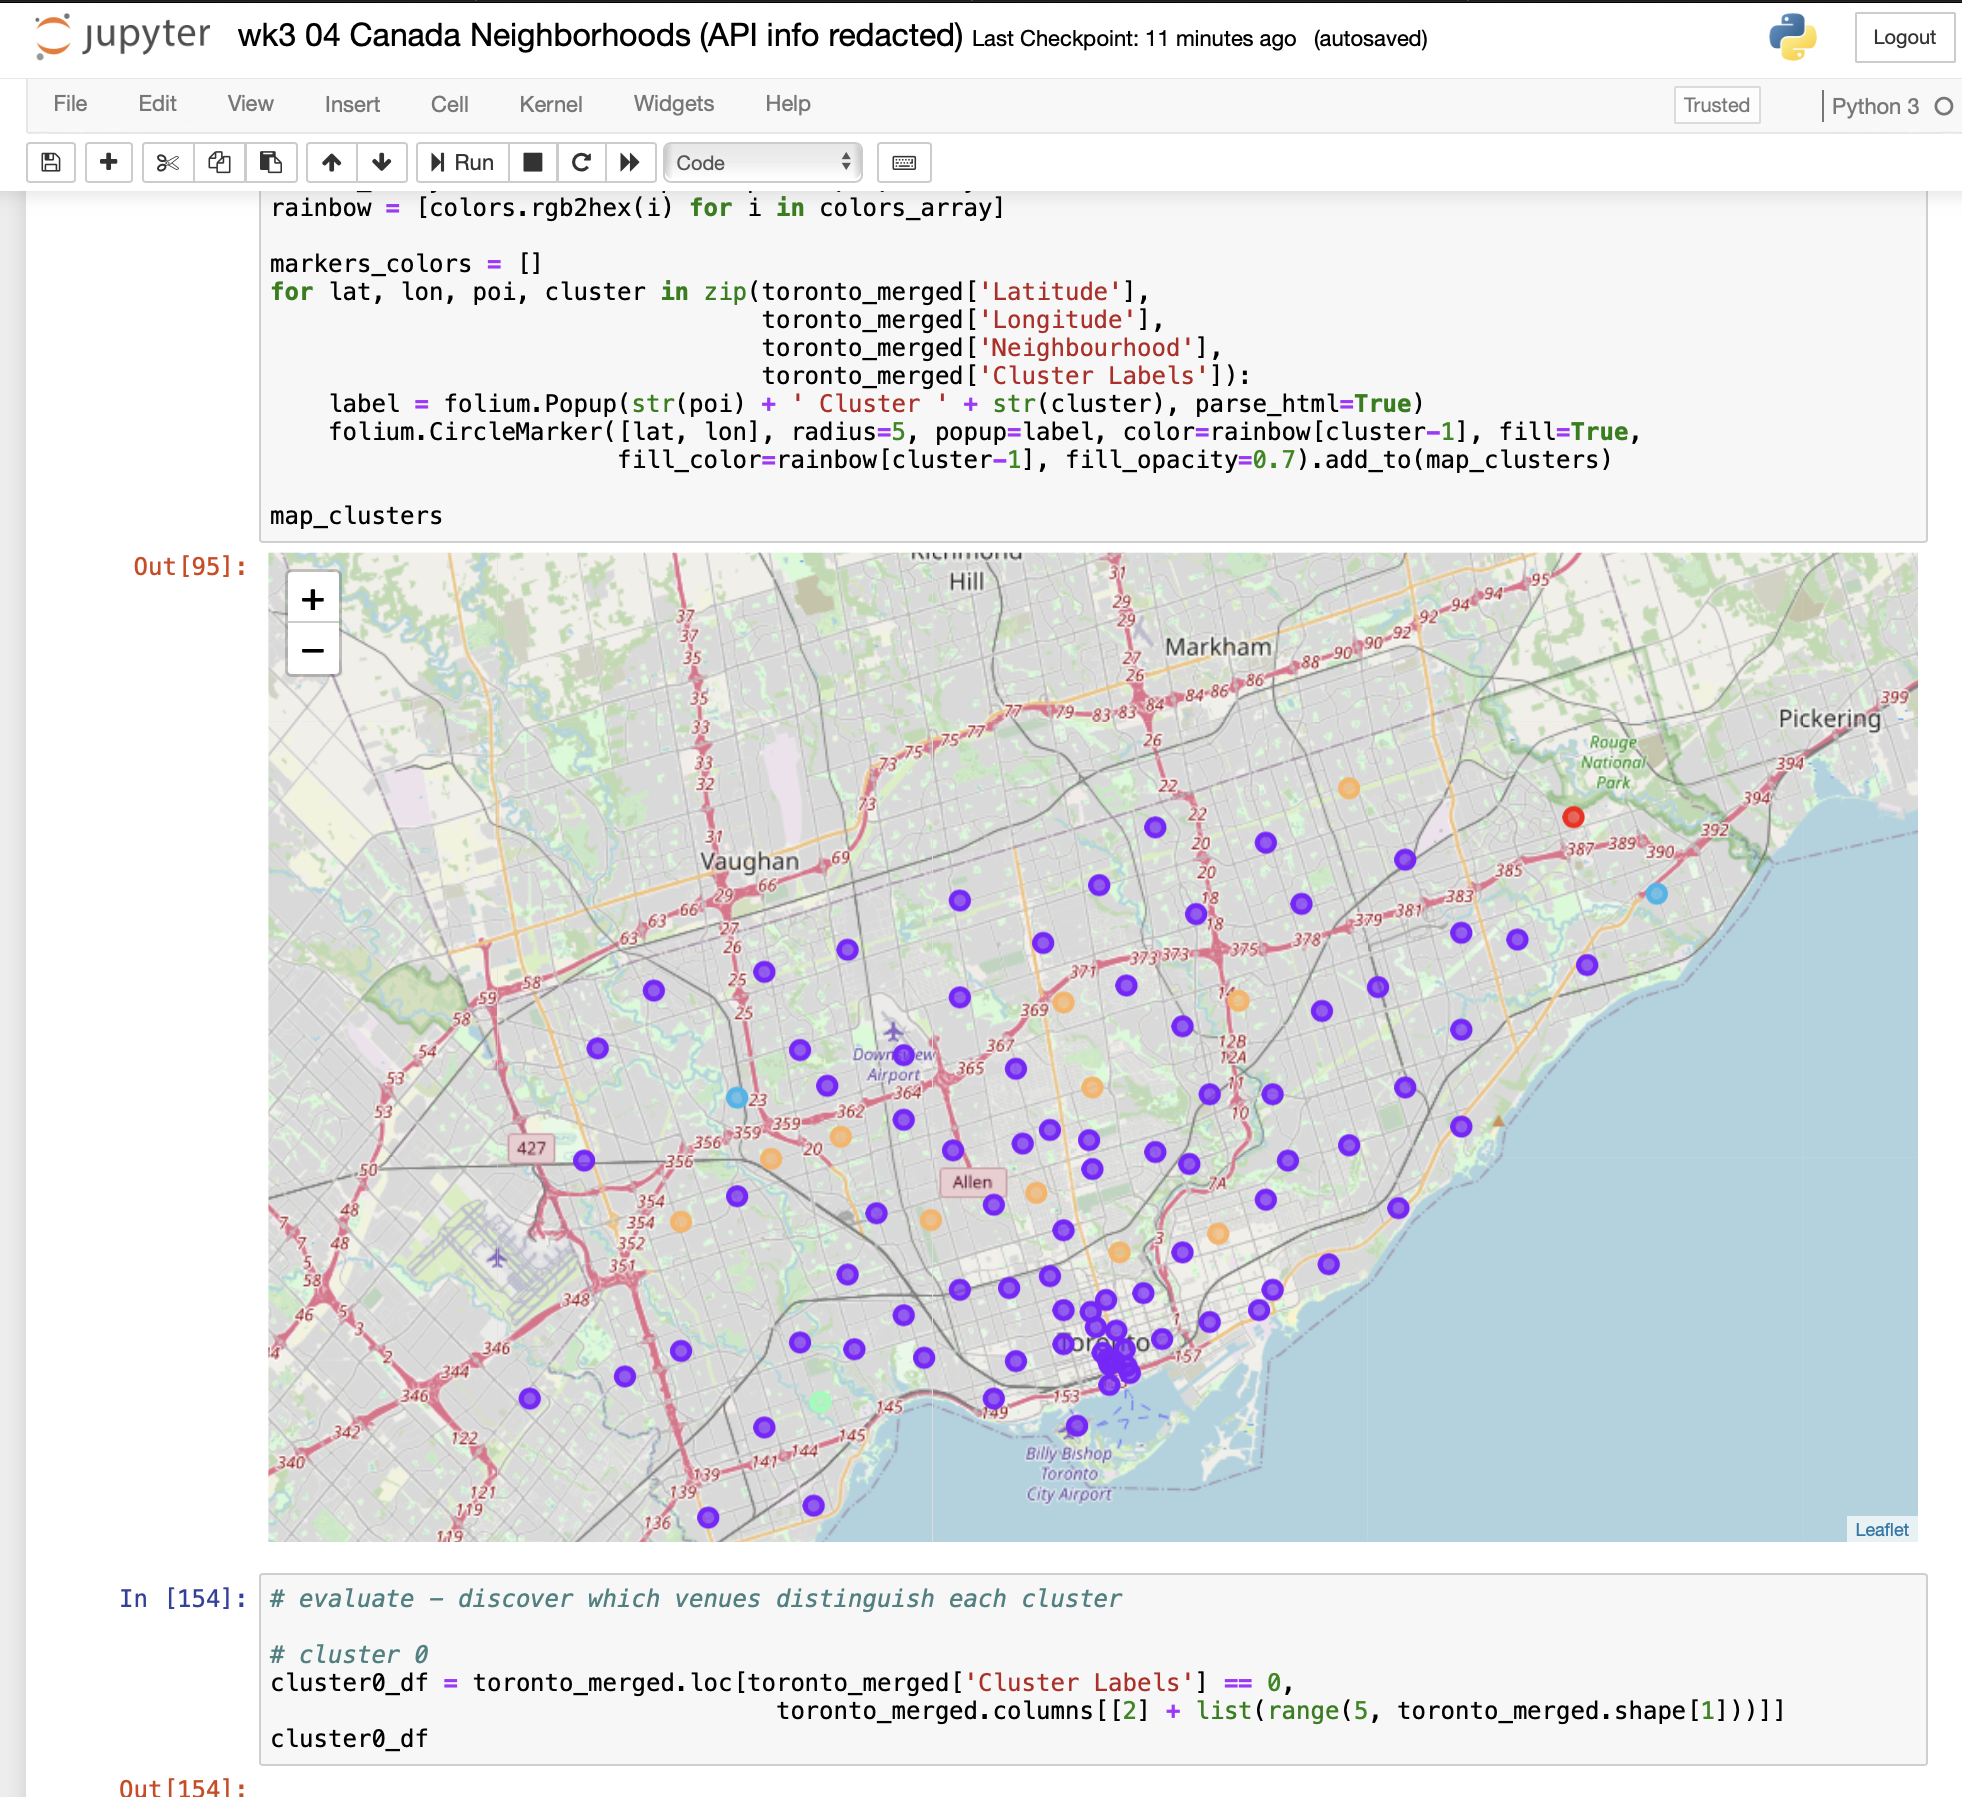

In [154]:
# evaluate - discover which venues distinguish each cluster

# cluster 0
cluster0_df = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, 
                                   toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]
cluster0_df

Neighbourhood  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
6  Malvern, Rouge               0  Fast Food Restaurant           Yoga Studio   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
6             Drugstore                 Diner        Discount Store   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
6   Distribution Center               Dog Run      Doner Restaurant   

  9th Most Common Venue 10th Most Common Venue  
6            Donut Shop    Dumpling Restaurant

In [183]:
# get top 10 venues for the manhattan cluster
def getTopTorontoVenues(cluster_df):
    temp_df = toronto_grouped
    temp_df = temp_df.set_index('Neighborhood')
    temp_df = temp_df.loc[list(cluster_df['Neighbourhood'])]
    temp_df = temp_df.T
    temp_df['Sum'] = temp_df.sum(axis=1)
    temp_df.sort_values(['Sum'], ascending=False, axis=0, inplace=True)
    return temp_df.head(10)

In [184]:
top10_df = getTopTorontoVenues(cluster0_df)
top10_df


Neighborhood                     Malvern, Rouge  Sum
Fast Food Restaurant                        1.0  1.0
Mexican Restaurant                          0.0  0.0
Monument / Landmark                         0.0  0.0
Molecular Gastronomy Restaurant             0.0  0.0
Modern European Restaurant                  0.0  0.0
Mobile Phone Shop                           0.0  0.0
Miscellaneous Shop                          0.0  0.0
Middle Eastern Restaurant                   0.0  0.0
Accessories Store                           0.0  0.0
Moroccan Restaurant                         0.0  0.0

### RESULT:  
  Cluster 0 has ony 1 venue type: Fast Food

In [126]:
# cluster 1
cluster1_df = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, 
                                 toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]
cluster1_df

Neighbourhood  Cluster Labels  \
1                                     Victoria Village               1   
2                            Regent Park, Harbourfront               1   
3                     Lawrence Manor, Lawrence Heights               1   
4                        Ontario Provincial Government               1   
7                                            Don Mills               1   
8                      Parkview Hill, Woodbine Gardens               1   
9                             Garden District, Ryerson               1   
10                                           Glencairn               1   
11   West Deane Park, Princess Gardens, Martin Grov...               1   
13                                           Don Mills               1   
14                                    Woodbine Heights               1   
15                                      St. James Town               1   
16                                  Humewood-Cedarvale               1   
17   Eringate, Bloordale Gardens, Old Burnhamthorpe...               1   
18                   Guildwood, Morningside, West Hill               1   
19                                         The Beaches               1   
20                                         Berczy Park               1   
22                                              Woburn               1   
23                                             Leaside               1   
24                                  Central Bay Street               1   
25                                            Christie               1   
26                                           Cedarbrae               1   
27                                   Hillcrest Village               1   
28     Bathurst Manor, Wilson Heights, Downsview North               1   
29                                    Thorncliffe Park               1   
30                            Richmond, Adelaide, King               1   
31                        Dufferin, Dovercourt Village               1   
32                                 Scarborough Village               1   
33                        Fairview, Henry Farm, Oriole               1   
34                     Northwood Park, York University               1   
36   Harbourfront East, Union Station, Toronto Islands               1   
37                            Little Portugal, Trinity               1   
38         Kennedy Park, Ionview, East Birchmount Park               1   
39                                     Bayview Village               1   
40                                           Downsview               1   
41                        The Danforth West, Riverdale               1   
42            Toronto Dominion Centre, Design Exchange               1   
43        Brockton, Parkdale Village, Exhibition Place               1   
44                     Golden Mile, Clairlea, Oakridge               1   
45                            York Mills, Silver Hills               1   
46                                           Downsview               1   
47                      India Bazaar, The Beaches West               1   
48                      Commerce Court, Victoria Hotel               1   
50                                       Humber Summit               1   
51     Cliffside, Cliffcrest, Scarborough Village West               1   
53                                           Downsview               1   
54                                     Studio District               1   
55                   Bedford Park, Lawrence Manor East               1   
56    Del Ray, Mount Dennis, Keelsdale and Silverthorn               1   
58                         Birch Cliff, Cliffside West               1   
59                                          Willowdale               1   
60                                           Downsview               1   
62                                            Roselawn               1   
63                       Runnymede, The Junct

In [185]:
top10_df = getTopTorontoVenues(cluster1_df)
top10_df

Neighborhood          Victoria Village  Regent Park, Harbourfront  \
Coffee Shop                       0.25                   0.155556   
Pizza Place                       0.25                   0.000000   
Café                              0.00                   0.044444   
Bakery                            0.00                   0.066667   
Grocery Store                     0.00                   0.000000   
Sandwich Place                    0.00                   0.000000   
Restaurant                        0.00                   0.022222   
Park                              0.00                   0.066667   
Bank                              0.00                   0.022222   
Fast Food Restaurant              0.00                   0.000000   

Neighborhood          Lawrence Manor, Lawrence Heights  \
Coffee Shop                                   0.083333   
Pizza Place                                   0.000000   
Café                                          0.000000   
Bakery                                        0.000000   
Grocery Store                                 0.000000   
Sandwich Place                                0.000000   
Restaurant                                    0.000000   
Park                                          0.000000   
Bank                                          0.000000   
Fast Food Restaurant                          0.000000   

Neighborhood          Ontario Provincial Government  Don Mills  \
Coffee Shop                                0.225806   0.086957   
Pizza Place                                0.000000   0.000000   
Café                                       0.032258   0.043478   
Bakery                                     0.000000   0.000000   
Grocery Store                              0.000000   0.043478   
Sandwich Place                             0.032258   0.043478   
Restaurant                                 0.000000   0.086957   
Park                                       0.032258   0.000000   
Bank                                       0.032258   0.000000   
Fast Food Restaurant                       0.000000   0.000000   

Neighborhood          Parkview Hill, Woodbine Gardens  \
Coffee Shop                                       0.0   
Pizza Place                                       0.2   
Café                                              0.1   
Bakery                                            0.0   
Grocery Store                                     0.0   
Sandwich Place                                    0.0   
Restaurant                                        0.0   
Park                                              0.0   
Bank                                              0.1   
Fast Food Restaurant                              0.0   

Neighborhood          Garden District, Ryerson  Glencairn  \
Coffee Shop                               0.08       0.00   
Pizza Place                               0.02       0.25   
Café                                      0.03       0.00   
Bakery                                    0.01       0.25   
Grocery Store                             0.00       0.00   
Sandwich Place                            0.01       0.00   
Restaurant                                0.01       0.00   
Park                                      0.01       0.00   
Bank                                      0.01       0.00   
Fast Food Restaurant                      0.02       0.00   

Neighborhood          West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale  \
Coffee Shop                                                         0.0                        
Pizza Place                                                         0.0                        
Café                                                                0.0                        
Bakery                                                              0.5                        
Grocery Store                                                       0.0                       

### RESULT:
  Cluster 1 has mostly Coffee Shops and Pizza Places

In [127]:
# cluster 2
cluster2_df = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, 
                                 toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]
cluster2_df

Neighbourhood  Cluster Labels  \
12  Rouge Hill, Port Union, Highland Creek               2   
57                        Humberlea, Emery               2   

         1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
12  Construction & Landscaping                   Bar           Yoga Studio   
57  Construction & Landscaping        Baseball Field           Yoga Studio   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
12   Dumpling Restaurant   Distribution Center               Dog Run   
57   Dumpling Restaurant   Distribution Center               Dog Run   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
12      Doner Restaurant            Donut Shop             Drugstore   
57      Doner Restaurant            Donut Shop             Drugstore   

         10th Most Common Venue  
12  Eastern European Restaurant  
57  Eastern European Restaurant

In [188]:
top10_df = getTopTorontoVenues(cluster2_df)
top10_df

Neighborhood                     Rouge Hill, Port Union, Highland Creek  \
Construction & Landscaping                                          0.5   
Bar                                                                 0.5   
Baseball Field                                                      0.0   
Accessories Store                                                   0.0   
Miscellaneous Shop                                                  0.0   
Monument / Landmark                                                 0.0   
Molecular Gastronomy Restaurant                                     0.0   
Modern European Restaurant                                          0.0   
Mobile Phone Shop                                                   0.0   
Middle Eastern Restaurant                                           0.0   

Neighborhood                     Humberlea, Emery  Sum  
Construction & Landscaping                    0.5  1.0  
Bar                                           0.0  0.5  
Baseball Field                                0.5  0.5  
Accessories Store                             0.0  0.0  
Miscellaneous Shop                            0.0  0.0  
Monument / Landmark                           0.0  0.0  
Molecular Gastronomy Restaurant               0.0  0.0  
Modern European Restaurant                    0.0  0.0  
Mobile Phone Shop                             0.0  0.0  
Middle Eastern Restaurant                     0.0  0.0

### RESULT:
  Cluster 2 has mostly Construction/Landscaping businesses

In [128]:
# cluster 3
cluster3_df = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, 
                                 toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]
cluster3_df

Neighbourhood  Cluster Labels  \
101  Old Mill South, King, Mill Park, Sunnylea, Hum...               3   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
101        Baseball Field           Yoga Studio             Drugstore   

    4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
101        Discount Store   Distribution Center               Dog Run   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
101      Doner Restaurant            Donut Shop   Dumpling Restaurant   

    10th Most Common Venue  
101         Farmers Market

In [189]:
top10_df = getTopTorontoVenues(cluster3_df)
top10_df

Neighborhood                     Old Mill South, King, Mill Park, Sunnylea, Humber Bay, Mimico NE, The Queensway East, Royal York South East, Kingsway Park South East  \
Baseball Field                                                                 1.0                                                                                       
Accessories Store                                                              0.0                                                                                       
Middle Eastern Restaurant                                                      0.0                                                                                       
Monument / Landmark                                                            0.0                                                                                       
Molecular Gastronomy Restaurant                                                0.0                                                                                       
Modern European Restaurant                                                     0.0                                                                                       
Mobile Phone Shop                                                              0.0                                                                                       
Miscellaneous Shop                                                             0.0                                                                                       
Mexican Restaurant                                                             0.0                                                                                       
Luggage Store                                                                  0.0                                                                                       

Neighborhood                     Sum  
Baseball Field                   1.0  
Accessories Store                0.0  
Middle Eastern Restaurant        0.0  
Monument / Landmark              0.0  
Molecular Gastronomy Restaurant  0.0  
Modern European Restaurant       0.0  
Mobile Phone Shop                0.0  
Miscellaneous Shop               0.0  
Mexican Restaurant               0.0  
Luggage Store                    0.0

### RESULT:
  Cluster 3 has a baseball field

In [129]:
# cluster 4
cluster4_df = toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, 
                                 toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]
cluster4_df

Neighbourhood  Cluster Labels  \
0                                           Parkwoods               4   
21                                Caledonia-Fairbanks               4   
35                                 The Danforth  East               4   
49           North Park, Maple Leaf Park, Upwood Park               4   
61                                      Lawrence Park               4   
64                                             Weston               4   
66                                    York Mills West               4   
68                            Forest Hill North, West               4   
77  Kingsview Village, St. Phillips, Martin Grove ...               4   
85  Milliken, Agincourt North, Steeles East, L'Amo...               4   
91                                           Rosedale               4   

   1st Most Common Venue       2nd Most Common Venue  \
0                   Park           Food & Drink Shop   
21                  Park               Women's Store   
35                  Park           Convenience Store   
49                  Park                      Bakery   
61                  Park                    Bus Line   
64                  Park               Jewelry Store   
66                  Park  Construction & Landscaping   
68         Jewelry Store                        Park   
77        Sandwich Place                        Park   
85            Playground                        Park   
91                  Park                       Trail   

         3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Yoga Studio             Drugstore        Discount Store   
21                        Pool           Yoga Studio            Donut Shop   
35                 Yoga Studio             Drugstore        Discount Store   
49  Construction & Landscaping        Massage Studio           Yoga Studio   
61                 Swim School           Yoga Studio            Donut Shop   
64                 Yoga Studio             Drugstore        Discount Store   
66           Convenience Store           Yoga Studio             Drugstore   
68            Sushi Restaurant                 Trail           Yoga Studio   
77           Mobile Phone Shop            Donut Shop                 Diner   
85                Intersection           Yoga Studio            Donut Shop   
91                  Playground           Yoga Studio    Dim Sum Restaurant   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0    Distribution Center               Dog Run      Doner Restaurant   
21                 Diner        Discount Store   Distribution Center   
35   Distribution Center               Dog Run      Doner Restaurant   
49            Donut Shop        Discount Store   Distribution Center   
61        Discount Store   Distribution Center               Dog Run   
64   Distribution Center               Dog Run      Doner Restaurant   
66        Discount Store   Distribution Center               Dog Run   
68                 Diner        Discount Store   Distribution Center   
77        Discount Store   Distribution Center               Dog Run   
85                 Diner        Discount Store   Distribution Center   
91                 Diner        Discount Store   Distribution Center   

   9th Most Common Venue       10th Most Common Venue  
0             Donut Shop          Dumpling Restaurant  
21               Dog Run             Doner Restaurant  
35            Donut Shop  Eastern European Restaurant  
49               Dog Run             Doner Restaurant  
61      Doner Restaurant                    Drugstore  
64            Donut Shop          Dumpling Restaurant  
66      Doner Restaurant                   Donut Shop  
68               Dog Run             Doner Restaurant  
77      Doner Restaurant                  Yoga Studio  
85               Dog Run             Doner Restaurant  
91               Dog Run             Doner Restaurant

In [190]:
top10_df = getTopTorontoVenues(cluster4_df)
top10_df

Neighborhood                Parkwoods  Caledonia-Fairbanks  \
Park                              0.5                  0.5   
Jewelry Store                     0.0                  0.0   
Convenience Store                 0.0                  0.0   
Construction & Landscaping        0.0                  0.0   
Playground                        0.0                  0.0   
Food & Drink Shop                 0.5                  0.0   
Trail                             0.0                  0.0   
Intersection                      0.0                  0.0   
Bus Line                          0.0                  0.0   
Mobile Phone Shop                 0.0                  0.0   

Neighborhood                The Danforth  East  \
Park                                  0.666667   
Jewelry Store                         0.000000   
Convenience Store                     0.333333   
Construction & Landscaping            0.000000   
Playground                            0.000000   
Food & Drink Shop                     0.000000   
Trail                                 0.000000   
Intersection                          0.000000   
Bus Line                              0.000000   
Mobile Phone Shop                     0.000000   

Neighborhood                North Park, Maple Leaf Park, Upwood Park  \
Park                                                            0.25   
Jewelry Store                                                   0.00   
Convenience Store                                               0.00   
Construction & Landscaping                                      0.25   
Playground                                                      0.00   
Food & Drink Shop                                               0.00   
Trail                                                           0.00   
Intersection                                                    0.00   
Bus Line                                                        0.00   
Mobile Phone Shop                                               0.00   

Neighborhood                Lawrence Park  Weston  York Mills West  \
Park                             0.333333     0.5         0.333333   
Jewelry Store                    0.000000     0.5         0.000000   
Convenience Store                0.000000     0.0         0.333333   
Construction & Landscaping       0.000000     0.0         0.333333   
Playground                       0.000000     0.0         0.000000   
Food & Drink Shop                0.000000     0.0         0.000000   
Trail                            0.000000     0.0         0.000000   
Intersection                     0.000000     0.0         0.000000   
Bus Line                         0.333333     0.0         0.000000   
Mobile Phone Shop                0.000000     0.0         0.000000   

Neighborhood                Forest Hill North, West  \
Park                                           0.25   
Jewelry Store                                  0.25   
Convenience Store                              0.00   
Construction & Landscaping                     0.00   
Playground                                     0.00   
Food & Drink Shop                              0.00   
Trail                                          0.25   
Intersection                                   0.00   
Bus Line                                       0.00   
Mobile Phone Shop                              0.00   

Neighborhood                Kingsview Village, St. Phillips, Martin Grove Gardens, Richview Gardens  \
Park                                                                 0.333333                         
Jewelry Store                                                        0.000000                         
Convenience Store                                                    0.000000                         
Construction & Landscaping                                           0.000000                         
Playground                                                           0.000000    

### RESULT:
  Cluster 5 has mostly parks